# 1 - Perkenalan

> Bab pengenalan harus diisi dengan identitas, query yang telah kalian buat pada Google Cloud Platform!, dan objective yang ingin dicapai.

Novanska Aginta Ganesha RMT-019

Dataset : credit_card_default pada bigquery data sets

Objective: 

Membuat model Classification untuk memprediksi default_payment_next_month menggunakan dataset

# 2 - Query SQL Codes

``` select safe_cast(sex as int64) as sex, safe_cast(education_level as int64) as education_level, safe_cast(marital_status as int64) as marital_status,safe_cast(pay_5 as float64) as pay_5, safe_cast(pay_6 as float64) as pay_6 ,safe_cast(default_payment_next_month as int64) as default_payment_next_month,limit_balance,age, pay_0, pay_2, pay_3, pay_4,bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6,from bigquery-public-data.ml_datasets.credit_card_default limit 37962 ```

# Import Libraries

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from feature_engine.outliers import Winsorizer

#import model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

#import classification evaluation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV 
from statsmodels.stats.outliers_influence import variance_inflation_factor

#model saving
import json
import joblib
import pickle

import warnings
warnings.filterwarnings("ignore")

# 3 - Data loading

> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [159]:
df = pd.read_csv('D:\Hacktiv8\Milestone 1\h8dsft_P1M1_novanska_aginta_ganesha.csv')

In [160]:
df.shape

(2965, 24)

In [161]:
df.isnull().sum()

sex                           0
education_level               0
marital_status                0
pay_5                         0
pay_6                         0
default_payment_next_month    0
limit_balance                 0
age                           0
pay_0                         0
pay_2                         0
pay_3                         0
pay_4                         0
bill_amt_1                    0
bill_amt_2                    0
bill_amt_3                    0
bill_amt_4                    0
bill_amt_5                    0
bill_amt_6                    0
pay_amt_1                     0
pay_amt_2                     0
pay_amt_3                     0
pay_amt_4                     0
pay_amt_5                     0
pay_amt_6                     0
dtype: int64

menurut data description pada bigquery

untuk membaca data : 

pada kolom sex : 1 = male , 2 = female

education_level : 1 = graduate school, 2 = university , 3 = highschool , 4 = others , 5 = unknown , 6 = unknown

marital_status : 1 = married , 2 = single , 3 = others

PAY_0,2,3,4,5,6: Repayment status in September 2005, August 2005, July 2005, June 2005, May 2005, April 2005 dimana
                -2= no consumption
                -1= pay duly
                1 = payment delay for one month
                2 = payment delay for two months
                ... 
                8 = payment delay for eight months
                9 = payment delay for nine months and above

In [162]:
#menampilkan 10 data awal
df.head(10)

,sex,education_level,marital_status,pay_5,pay_6,default_payment_next_month,limit_balance,age,pay_0,pay_2,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,1,6,1,0.0,0.0,1,80000.0,54.0,0.0,0.0,...,62290.0,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0
1,1,4,1,0.0,0.0,0,200000.0,49.0,0.0,0.0,...,50942.0,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0
2,2,6,2,0.0,0.0,1,20000.0,22.0,0.0,0.0,...,15535.0,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0
3,2,4,2,0.0,0.0,0,260000.0,33.0,0.0,0.0,...,27086.0,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0
4,1,4,2,0.0,0.0,0,150000.0,32.0,0.0,0.0,...,161192.0,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0
5,2,4,2,0.0,-1.0,0,300000.0,32.0,0.0,0.0,...,64747.0,65150.0,-450.0,700.0,15235.0,1491.0,1303.0,0.0,2000.0,1400.0
6,1,1,1,0.0,0.0,0,130000.0,45.0,0.0,0.0,...,61156.0,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0
7,1,1,1,0.0,0.0,0,200000.0,58.0,0.0,0.0,...,122214.0,124647.0,126921.0,129167.0,7822.0,4417.0,4446.0,4597.0,4677.0,4698.0
8,1,1,1,0.0,0.0,0,500000.0,39.0,0.0,0.0,...,171106.0,174500.0,137406.0,204975.0,54209.0,4607.0,4603.0,5224.0,207440.0,7509.0
9,1,1,1,0.0,0.0,0,230000.0,48.0,0.0,0.0,...,165107.0,105508.0,108101.0,110094.0,7000.0,6607.0,3773.0,4290.0,4164.0,2000.0


In [163]:
#check unique values pada kolom default payment next month
df['default_payment_next_month'].unique()

array([1, 0], dtype=int64)

In [164]:
#menampilkan 10 data terakhir
df.tail(10)

,sex,education_level,marital_status,pay_5,pay_6,default_payment_next_month,limit_balance,age,pay_0,pay_2,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
2955,2,2,2,-2.0,-2.0,0,360000.0,26.0,-1.0,-1.0,...,2500.0,0.0,0.0,0.0,463.0,2500.0,0.0,0.0,0.0,0.0
2956,1,3,1,-2.0,-2.0,0,100000.0,40.0,0.0,0.0,...,2377.0,0.0,0.0,0.0,2000.0,2377.0,40000.0,0.0,0.0,0.0
2957,2,3,1,-2.0,-2.0,0,30000.0,48.0,1.0,-1.0,...,0.0,0.0,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0
2958,2,3,1,-2.0,-1.0,0,80000.0,39.0,-1.0,-1.0,...,5000.0,0.0,0.0,5000.0,5000.0,5000.0,0.0,5000.0,5000.0,470.0
2959,1,3,2,-2.0,-2.0,0,20000.0,26.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,1560.0,0.0,0.0,0.0,0.0,0.0
2960,2,3,2,-2.0,-2.0,0,80000.0,28.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,2800.0,0.0,0.0,0.0,0.0,0.0
2961,2,3,1,-2.0,-2.0,1,50000.0,51.0,-1.0,-1.0,...,5880.0,0.0,0.0,0.0,300.0,5880.0,0.0,0.0,0.0,0.0
2962,2,2,1,-2.0,-2.0,1,450000.0,38.0,-2.0,-2.0,...,390.0,390.0,390.0,390.0,390.0,780.0,390.0,390.0,390.0,390.0
2963,2,2,1,-2.0,-2.0,0,50000.0,44.0,-2.0,-2.0,...,390.0,390.0,390.0,0.0,390.0,390.0,390.0,390.0,0.0,780.0
2964,2,2,1,-2.0,-2.0,0,290000.0,39.0,1.0,-2.0,...,390.0,3184.0,390.0,390.0,10000.0,800.0,3184.0,390.0,390.0,6617.0


In [165]:
#check data duplikat
df.duplicated().sum()

1

In [166]:
#drop data duplikat
df = df.drop_duplicates()

In [167]:
#check data tanpa duplicat
df

,sex,education_level,marital_status,pay_5,pay_6,default_payment_next_month,limit_balance,age,pay_0,pay_2,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,1,6,1,0.0,0.0,1,80000.0,54.0,0.0,0.0,...,62290.0,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0
1,1,4,1,0.0,0.0,0,200000.0,49.0,0.0,0.0,...,50942.0,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0
2,2,6,2,0.0,0.0,1,20000.0,22.0,0.0,0.0,...,15535.0,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0
3,2,4,2,0.0,0.0,0,260000.0,33.0,0.0,0.0,...,27086.0,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0
4,1,4,2,0.0,0.0,0,150000.0,32.0,0.0,0.0,...,161192.0,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,2,3,2,-2.0,-2.0,0,80000.0,28.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,2800.0,0.0,0.0,0.0,0.0,0.0
2961,2,3,1,-2.0,-2.0,1,50000.0,51.0,-1.0,-1.0,...,5880.0,0.0,0.0,0.0,300.0,5880.0,0.0,0.0,0.0,0.0
2962,2,2,1,-2.0,-2.0,1,450000.0,38.0,-2.0,-2.0,...,390.0,390.0,390.0,390.0,390.0,780.0,390.0,390.0,390.0,390.0
2963,2,2,1,-2.0,-2.0,0,50000.0,44.0,-2.0,-2.0,...,390.0,390.0,390.0,0.0,390.0,390.0,390.0,390.0,0.0,780.0


In [168]:
#check unique values kolom education level
df['education_level'].unique()

array([6, 4, 1, 2, 3, 5, 0], dtype=int64)

In [169]:
#copy data ke variable df agar data asli tidak berubah
data = df.copy()

In [170]:
#check jumlah unique values pada setiap kolom
df.nunique()

sex                              2
education_level                  7
marital_status                   4
pay_5                            9
pay_6                            8
default_payment_next_month       2
limit_balance                   59
age                             49
pay_0                           11
pay_2                           10
pay_3                            9
pay_4                           10
bill_amt_1                    2643
bill_amt_2                    2592
bill_amt_3                    2549
bill_amt_4                    2504
bill_amt_5                    2482
bill_amt_6                    2461
pay_amt_1                     1415
pay_amt_2                     1372
pay_amt_3                     1302
pay_amt_4                     1214
pay_amt_5                     1194
pay_amt_6                     1189
dtype: int64

# 4 - Exploratory Data Analysis (EDA)

mengubah kolom default_payment_next_month menjadi default_payment untuk mempersingkat dalam pembacaan dan membantu permodelan

In [171]:
#mengubah kolom default_payment_next_month menjadi default_payment untuk mempersingkat pembacaan dan permodelan
data.rename(columns={"default_payment_next_month": 'default_payment'},inplace=True)

In [172]:
#check data apakah kolom default_payment_next_month sudah berubah
data

,sex,education_level,marital_status,pay_5,pay_6,default_payment,limit_balance,age,pay_0,pay_2,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,1,6,1,0.0,0.0,1,80000.0,54.0,0.0,0.0,...,62290.0,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0
1,1,4,1,0.0,0.0,0,200000.0,49.0,0.0,0.0,...,50942.0,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0
2,2,6,2,0.0,0.0,1,20000.0,22.0,0.0,0.0,...,15535.0,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0
3,2,4,2,0.0,0.0,0,260000.0,33.0,0.0,0.0,...,27086.0,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0
4,1,4,2,0.0,0.0,0,150000.0,32.0,0.0,0.0,...,161192.0,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,2,3,2,-2.0,-2.0,0,80000.0,28.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,2800.0,0.0,0.0,0.0,0.0,0.0
2961,2,3,1,-2.0,-2.0,1,50000.0,51.0,-1.0,-1.0,...,5880.0,0.0,0.0,0.0,300.0,5880.0,0.0,0.0,0.0,0.0
2962,2,2,1,-2.0,-2.0,1,450000.0,38.0,-2.0,-2.0,...,390.0,390.0,390.0,390.0,390.0,780.0,390.0,390.0,390.0,390.0
2963,2,2,1,-2.0,-2.0,0,50000.0,44.0,-2.0,-2.0,...,390.0,390.0,390.0,0.0,390.0,390.0,390.0,390.0,0.0,780.0


check jumlah data default_payment

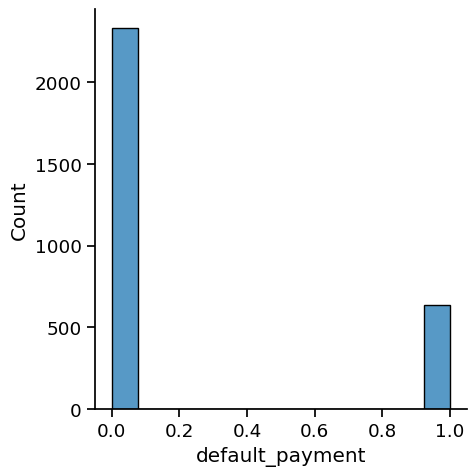

In [173]:
#check jumlah default_payment pada unique values (0) dan (1) menggunakan plot
sns.displot(x = data['default_payment'])

In [174]:
data['default_payment'].value_counts()

0    2329
1     635
Name: default_payment, dtype: int64

Insight : 

terdapat 2.369 data dengan default_payment = no(0) dan terdapat 635 data dengan default_payment = yes(1)

<Axes: xlabel='sex', ylabel='count'>

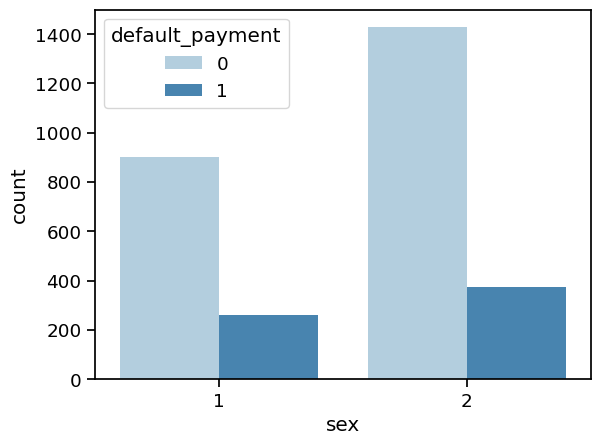

In [175]:
#check banyaknya data default_payment terhadap sex :
sns.countplot(x="sex", hue="default_payment", data=data, palette="Blues")

<Axes: xlabel='education_level', ylabel='count'>

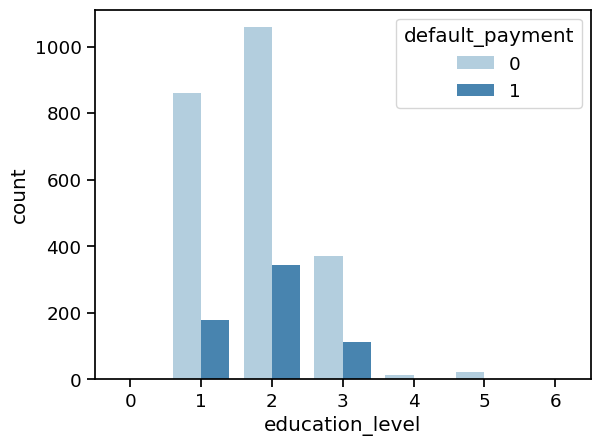

In [176]:
#check banyaknya data default_payment terhadap education
sns.countplot(x="education_level", hue="default_payment", data=data, palette="Blues")

Insight :

kebanyakan client credit card berasal dari graduate school dan university

<Axes: xlabel='marital_status', ylabel='count'>

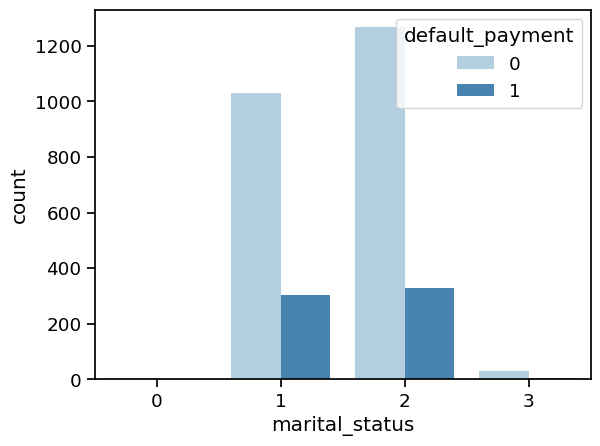

In [177]:
#check banyaknya data default_payment terhadap marriage
sns.countplot(x="marital_status", hue="default_payment", data=data, palette="Blues")

Insight : 

hampir seluruh client credit card menikah atau single.

<Axes: xlabel='pay_0', ylabel='count'>

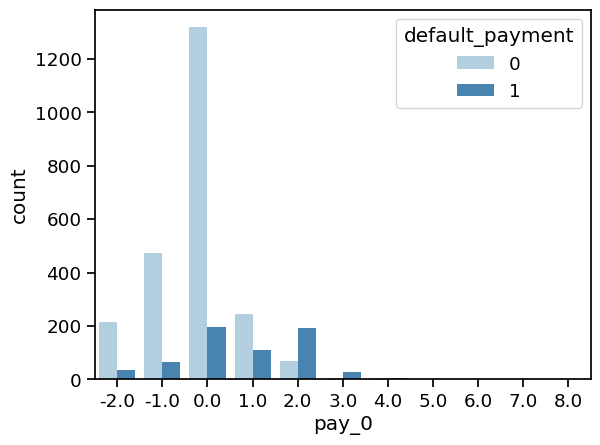

In [178]:
#check banyaknya data default_payment terhadap pay_0
sns.countplot(x="pay_0", hue="default_payment", data=data, palette="Blues")

<Axes: xlabel='pay_2', ylabel='count'>

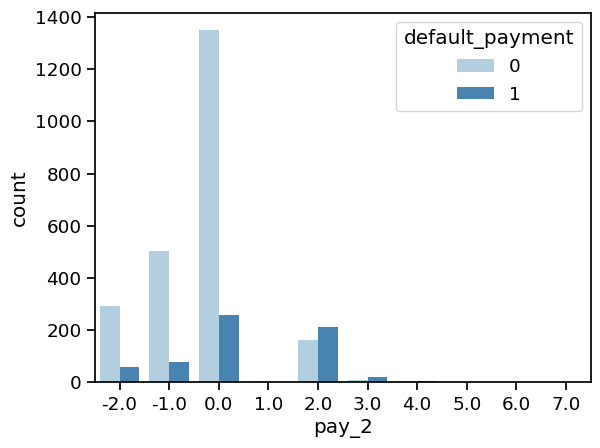

In [179]:
#check banyaknya data default_payment terhadap pay_2
sns.countplot(x="pay_2", hue="default_payment", data=data, palette="Blues")

<Axes: xlabel='pay_3', ylabel='count'>

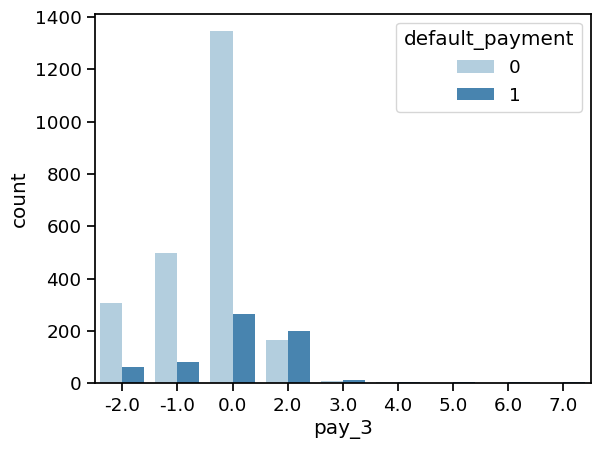

In [180]:
#check banyaknya data default_payment terhadap pay_3
sns.countplot(x="pay_3", hue="default_payment", data=data, palette="Blues")

<Axes: xlabel='pay_4', ylabel='count'>

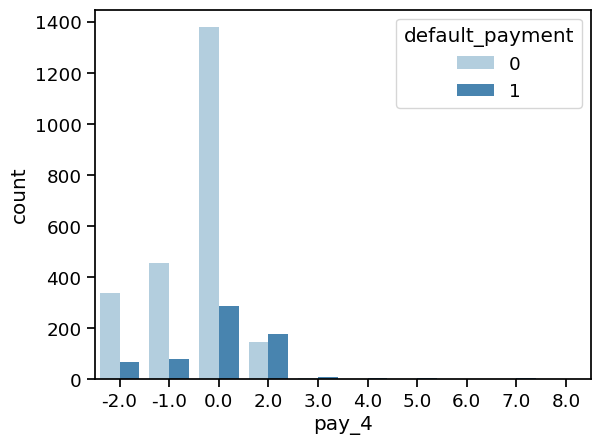

In [181]:
#check banyaknya data default_payment terhadap pay_4
sns.countplot(x="pay_4", hue="default_payment", data=data, palette="Blues")

<Axes: xlabel='pay_5', ylabel='count'>

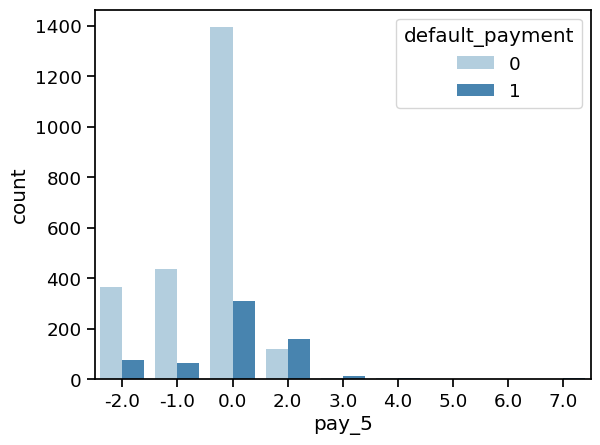

In [182]:
#check banyaknya data default_payment terhadap pay_5
sns.countplot(x="pay_5", hue="default_payment", data=data, palette="Blues")

<Axes: xlabel='pay_6', ylabel='count'>

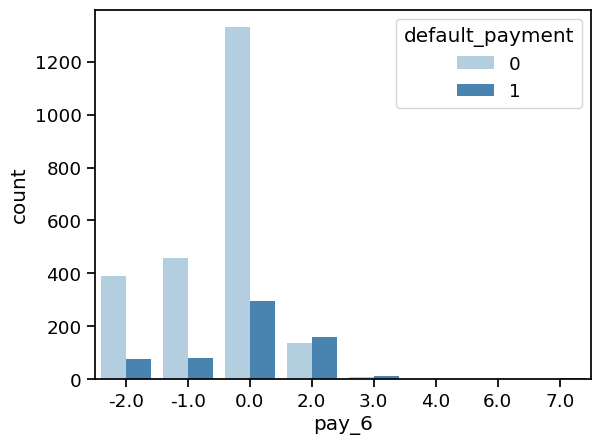

In [183]:
#check banyaknya data default_payment terhadap pay_6
sns.countplot(x="pay_6", hue="default_payment", data=data, palette="Blues")

Insight :

dari data pay_0,pay_2,pay_3,pay_4,pay_5,pay_6 melakukan payment setelah 1 bulan.

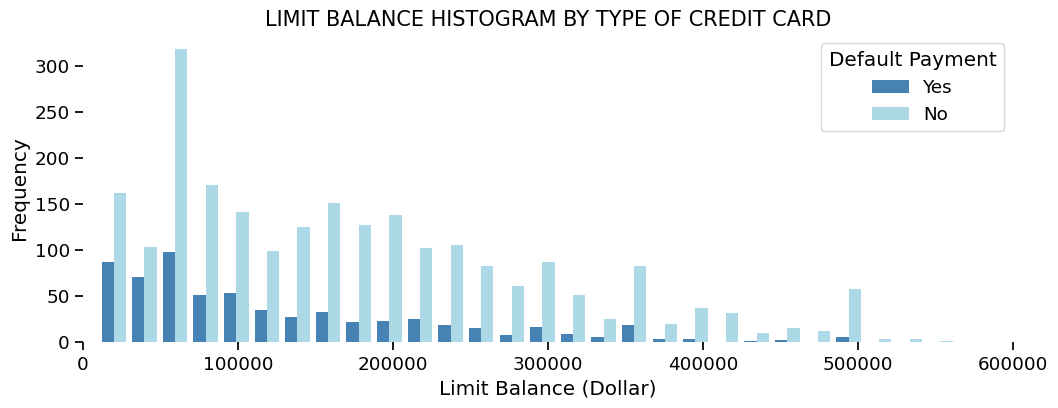

In [184]:
x1 = list(data[data['default_payment'] == 1]['limit_balance'])
x2 = list(data[data['default_payment'] == 0]['limit_balance'])
plt.figure(figsize=(12,4))
sns.set_context('notebook', font_scale=1.2)
plt.hist([x1, x2], bins = 40, color=['steelblue', 'lightblue'])
plt.xlim([0,600000])
plt.legend(['Yes', 'No'], title = 'Default Payment', loc='upper right', facecolor='white')
plt.xlabel('Limit Balance (Dollar)')
plt.ylabel('Frequency')
plt.title('LIMIT BALANCE HISTOGRAM BY TYPE OF CREDIT CARD', size=15)
plt.box(False)

Insight : 

kebanyakan client dengan limit dibawah 100rb tidak melakukan default_payment dan banyak juga client dengan limit dibawah 100rb yang melakukan default_payment

### Statistika Deskriptif

In [185]:
#check data
data.describe()

,sex,education_level,marital_status,pay_5,pay_6,default_payment,limit_balance,age,pay_0,pay_2,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
count,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,...,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2.964000e+03,2964.000000,2964.000000,2964.000000,2964.000000
mean,1.607625,1.849865,1.560054,-0.224696,-0.254049,0.214238,163356.950067,35.193657,0.004723,-0.121795,...,48256.032726,44104.558367,40969.898448,39786.491228,6351.044872,6.274611e+03,5152.234818,4562.914980,4914.944332,5384.517544
std,0.488362,0.778159,0.522304,1.158739,1.167061,0.410362,125049.701016,9.110949,1.114434,1.180479,...,68151.445516,61912.600106,58276.878626,57308.498646,20888.933729,2.888432e+04,14289.177313,13283.476236,16736.920951,17278.585006
min,1.000000,0.000000,0.000000,-2.000000,-2.000000,0.000000,10000.000000,21.000000,-2.000000,-2.000000,...,-25443.000000,-46627.000000,-46627.000000,-73895.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,-1.000000,-1.000000,0.000000,50000.000000,28.000000,-1.000000,-1.000000,...,3311.750000,2585.000000,1974.500000,1433.000000,1013.000000,9.975000e+02,479.250000,313.750000,325.250000,175.250000
50%,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,140000.000000,34.000000,0.000000,0.000000,...,21549.500000,19895.000000,18819.500000,18511.500000,2238.000000,2.182500e+03,1997.000000,1600.000000,1646.500000,1626.500000
75%,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,230000.000000,41.000000,0.000000,0.000000,...,63034.500000,58638.500000,53414.500000,52297.000000,5089.500000,5.000000e+03,4500.000000,4000.250000,4021.000000,4081.750000
max,2.000000,6.000000,3.000000,7.000000,7.000000,1.000000,800000.000000,69.000000,8.000000,7.000000,...,578971.000000,488808.000000,441981.000000,436172.000000,493358.000000,1.227082e+06,199209.000000,202076.000000,388071.000000,403500.000000


Insight : 
rata-rata limit balance pada setiap credit card yaitu 163.556$ dengan range dari 10.000$ sampai 800.000$

rata-rata pemegang kartu kredit kebanyakan adalah perempuan (2) dan sisanya laki-laki(1)

dengan education_level berada pada graduate school(1) dan university(2) , kebanyakan pemegang kartu kredit rata-rata sudah menikah atau single. dan rata-rata pemegang kartu kredit berumur 35 tahun 

### Korelasi

<Axes: >

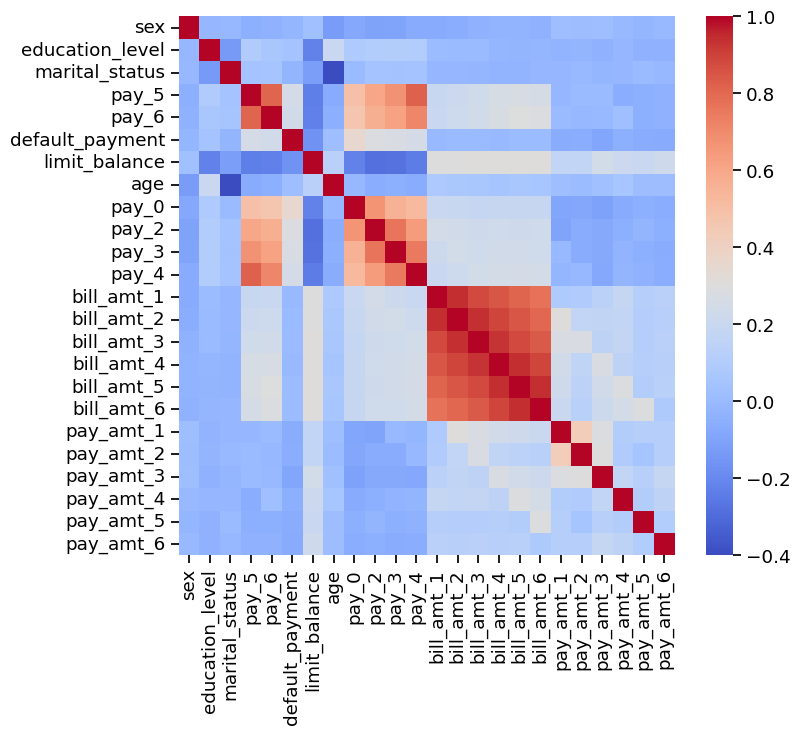

In [186]:
#check korelasi menggunakan heatmap
corr = data.corr()
f , ax = plt.subplots(figsize=(8,7))
sns.heatmap(corr,annot=False,cmap='coolwarm')

Insight : 

Heatmap menunjukkan bahwa fitur-fitur berkorelasi satu sama lain (kolinearitas), seperti PAY_0,2,3,4,5,6 dan BILL_AMT1,2,3,4,5,6. Dalam kasus tersebut, korelasinya positif.

# 5 - Feature Engineering

> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

## Missing Values

In [187]:
data.isnull().sum()

sex                0
education_level    0
marital_status     0
pay_5              0
pay_6              0
default_payment    0
limit_balance      0
age                0
pay_0              0
pay_2              0
pay_3              0
pay_4              0
bill_amt_1         0
bill_amt_2         0
bill_amt_3         0
bill_amt_4         0
bill_amt_5         0
bill_amt_6         0
pay_amt_1          0
pay_amt_2          0
pay_amt_3          0
pay_amt_4          0
pay_amt_5          0
pay_amt_6          0
dtype: int64

Tidak ada missing values.

## Handling Cardinallity

Setelah melihat banyaknya nunique pada beberapa kolom yang tidak sesuai dengan description maka akan diubah beberapa data.

In [188]:
#penggantian data unknown pada kolom education level menjadi data others (4)
data['education_level']=np.where(data['education_level'] == 5, 4, data['education_level'])
data['education_level']=np.where(data['education_level'] == 6, 4, data['education_level'])
data['education_level']=np.where(data['education_level'] == 0, 4, data['education_level'])

In [189]:
#check unique values pada data education_level yang sudah diganti
data['education_level'].unique()

array([4, 1, 2, 3], dtype=int64)

mengubah data (0) pada marital_status (unknown) menjadi 3 (others)

In [190]:
#penggantian data unknown pada kolom marital_status menjadi others (3)
data['marital_status']=np.where(data['marital_status'] == 0, 3, data['marital_status'])


In [191]:
#check unique values pada data marital_status yang sudah diganti
data['marital_status'].unique()

array([1, 2, 3], dtype=int64)

## Handling Outliers

In [192]:
data.skew()

sex                -0.441056
education_level     0.476014
marital_status      0.020349
pay_5               1.060916
pay_6               0.979319
default_payment     1.393676
limit_balance       1.000605
age                 0.772632
pay_0               0.927672
pay_2               0.862469
pay_3               0.932184
pay_4               1.102317
bill_amt_1          2.484229
bill_amt_2          2.457971
bill_amt_3          2.569559
bill_amt_4          2.447792
bill_amt_5          2.399944
bill_amt_6          2.432000
pay_amt_1          11.875903
pay_amt_2          29.399792
pay_amt_3           8.043463
pay_amt_4           8.450288
pay_amt_5          11.467169
pay_amt_6           9.758714
dtype: float64

dengan melihat deskripsi dari dataset kita dapat menyimpulkan bahwa ada kolom numerical dan categorical ( walaupun data ter-set sebagai int64 dan float) yang artinya data categorical sudah di encoding.

kita akan split data numerical dan categorical kembali agar bisa check outlier pada data tersebut.

In [193]:
# split data numerical dan categorical
num_columns = ['limit_balance', 'age', 
               'bill_amt_1','bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
               'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5','pay_amt_6']
cat_columns = ['sex', 'education_level', 'marital_status',
               'pay_0','pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6','default_payment']

handling outlier menggunakan metode capping karena data outlier terindikasi natural outlier.

In [194]:
#handling outlier mengguna
windsoriser = Winsorizer(capping_method='iqr',
                         tail='both',
                         fold=1.5,
                         variables=num_columns)

windsoriser.fit(data)
data_t = windsoriser.transform(data)

In [195]:
# Menampilkan nilai minimum dari tiap kolom
print('Left Tail Caps  : ', windsoriser.left_tail_caps_)

# Menampilkan nilai maximum dari tiap kolom
print('Right Tail Caps : ', windsoriser.right_tail_caps_)

Left Tail Caps  :  {'limit_balance': -220000.0, 'age': 8.5, 'bill_amt_1': -94845.125, 'bill_amt_2': -93245.625, 'bill_amt_3': -86272.375, 'bill_amt_4': -81495.25, 'bill_amt_5': -75185.5, 'bill_amt_6': -74863.0, 'pay_amt_1': -5101.75, 'pay_amt_2': -5006.25, 'pay_amt_3': -5551.875, 'pay_amt_4': -5216.0, 'pay_amt_5': -5218.375, 'pay_amt_6': -5684.5}
Right Tail Caps :  {'limit_balance': 500000.0, 'age': 60.5, 'bill_amt_1': 168687.875, 'bill_amt_2': 164485.375, 'bill_amt_3': 152618.625, 'bill_amt_4': 142718.75, 'bill_amt_5': 130574.5, 'bill_amt_6': 128593.0, 'pay_amt_1': 11204.25, 'pay_amt_2': 11003.75, 'pay_amt_3': 10531.125, 'pay_amt_4': 9530.0, 'pay_amt_5': 9564.625, 'pay_amt_6': 9941.5}


In [196]:
data_num = data_t[num_columns]

In [197]:
data_num

,limit_balance,age,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,80000.0,54.0,61454.0,61808.0,62290.000,29296.00,26210.0,17643.0,2545.0,2208.00,1336.000,2232.0,542.0,348.0
1,200000.0,49.0,49221.0,49599.0,50942.000,50146.00,50235.0,48984.0,1689.0,2164.00,2500.000,3480.0,2500.0,3000.0
2,20000.0,22.0,19568.0,19420.0,15535.000,1434.00,500.0,0.0,4641.0,1019.00,900.000,0.0,1500.0,0.0
3,260000.0,33.0,18457.0,22815.0,27086.000,27821.00,30767.0,29890.0,5000.0,5000.00,1137.000,5000.0,1085.0,5000.0
4,150000.0,32.0,159919.0,68686.0,152618.625,142718.75,130574.5,128593.0,4019.0,11003.75,10531.125,4600.0,4709.0,5600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,80000.0,28.0,4280.0,2800.0,0.000,0.00,0.0,0.0,2800.0,0.00,0.000,0.0,0.0,0.0
2961,50000.0,51.0,752.0,300.0,5880.000,0.00,0.0,0.0,300.0,5880.00,0.000,0.0,0.0,0.0
2962,450000.0,38.0,390.0,390.0,390.000,390.00,390.0,390.0,390.0,780.00,390.000,390.0,390.0,390.0
2963,50000.0,44.0,1473.0,390.0,390.000,390.00,390.0,0.0,390.0,390.00,390.000,390.0,0.0,780.0


In [198]:
data_cat = data_t[cat_columns]

In [199]:
data_cat

,sex,education_level,marital_status,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,default_payment
0,1,4,1,0.0,0.0,0.0,0.0,0.0,0.0,1
1,1,4,1,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2,4,2,0.0,0.0,0.0,0.0,0.0,0.0,1
3,2,4,2,0.0,0.0,0.0,0.0,0.0,0.0,0
4,1,4,2,0.0,0.0,0.0,-1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
2960,2,3,2,-1.0,-1.0,-1.0,-2.0,-2.0,-2.0,0
2961,2,3,1,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0,1
2962,2,2,1,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,1
2963,2,2,1,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,0


## Feature Scalling

pada feature scalling akan digunakan minmaxscaler karena minmaxscaler tidak merubah bentuk distribusi asli pada data.

In [200]:
scaler = MinMaxScaler() # Menggunakan syntax MinMaxScaler()
scaler.fit(data_num) # Melatih data train

data_num_scaled = scaler.transform(data_num)

In [201]:
data_num_scaled = pd.DataFrame(data_num_scaled,columns = num_columns)

In [202]:
data_num_scaled

,limit_balance,age,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,0.142857,0.835443,0.405026,0.557447,0.492711,0.400975,0.411041,0.452066,0.227146,0.200659,0.126862,0.234208,0.056667,0.035005
1,0.387755,0.708861,0.337153,0.504824,0.428981,0.511091,0.546621,0.606846,0.150746,0.196660,0.237392,0.365163,0.261380,0.301765
2,0.020408,0.025316,0.172627,0.374749,0.230134,0.253827,0.265951,0.364935,0.414218,0.092605,0.085461,0.000000,0.156828,0.000000
3,0.510204,0.303797,0.166462,0.389382,0.295005,0.393185,0.436757,0.512549,0.446259,0.454391,0.107966,0.524659,0.113439,0.502942
4,0.285714,0.278481,0.951347,0.587092,1.000000,1.000000,1.000000,1.000000,0.358703,1.000000,1.000000,0.482686,0.492335,0.563295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2959,0.142857,0.177215,0.087803,0.303114,0.142889,0.246253,0.263130,0.364935,0.249905,0.000000,0.000000,0.000000,0.000000,0.000000
2960,0.081633,0.759494,0.068228,0.292339,0.175911,0.246253,0.263130,0.364935,0.026776,0.534363,0.000000,0.000000,0.000000,0.000000
2961,0.897959,0.430380,0.066220,0.292727,0.145079,0.248313,0.265331,0.366861,0.034808,0.070885,0.037033,0.040923,0.040775,0.039229
2962,0.081633,0.582278,0.072229,0.292727,0.145079,0.248313,0.265331,0.364935,0.034808,0.035442,0.037033,0.040923,0.000000,0.078459


## Feature Encoding


menurut saya data categorical tidak perlu dilakukan encoding dikarenakan data sudah ter encode seperti sex : female = 2 dan male = 1

In [203]:
data_final = pd.concat([data_num_scaled,data_cat],axis=1)

In [204]:
data_final.isnull().sum()

limit_balance      1
age                1
bill_amt_1         1
bill_amt_2         1
bill_amt_3         1
bill_amt_4         1
bill_amt_5         1
bill_amt_6         1
pay_amt_1          1
pay_amt_2          1
pay_amt_3          1
pay_amt_4          1
pay_amt_5          1
pay_amt_6          1
sex                1
education_level    1
marital_status     1
pay_0              1
pay_2              1
pay_3              1
pay_4              1
pay_5              1
pay_6              1
default_payment    1
dtype: int64

In [205]:
data_final = data_final.dropna()

In [206]:
data_final

,limit_balance,age,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,...,sex,education_level,marital_status,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,default_payment
0,0.142857,0.835443,0.405026,0.557447,0.492711,0.400975,0.411041,0.452066,0.227146,0.200659,...,1.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.387755,0.708861,0.337153,0.504824,0.428981,0.511091,0.546621,0.606846,0.150746,0.196660,...,1.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.020408,0.025316,0.172627,0.374749,0.230134,0.253827,0.265951,0.364935,0.414218,0.092605,...,2.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.510204,0.303797,0.166462,0.389382,0.295005,0.393185,0.436757,0.512549,0.446259,0.454391,...,2.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.285714,0.278481,0.951347,0.587092,1.000000,1.000000,1.000000,1.000000,0.358703,1.000000,...,1.0,4.0,2.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2959,0.142857,0.177215,0.087803,0.303114,0.142889,0.246253,0.263130,0.364935,0.249905,0.000000,...,1.0,3.0,2.0,-1.0,-1.0,-1.0,-2.0,-2.0,-2.0,0.0
2960,0.081633,0.759494,0.068228,0.292339,0.175911,0.246253,0.263130,0.364935,0.026776,0.534363,...,2.0,3.0,2.0,-1.0,-1.0,-1.0,-2.0,-2.0,-2.0,0.0
2961,0.897959,0.430380,0.066220,0.292727,0.145079,0.248313,0.265331,0.366861,0.034808,0.070885,...,2.0,3.0,1.0,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0,1.0
2962,0.081633,0.582278,0.072229,0.292727,0.145079,0.248313,0.265331,0.364935,0.034808,0.035442,...,2.0,2.0,1.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,1.0


## Split X(target) dan Y(features)

melakukan split data menjadi variable X dan Y untuk mempermudah proses predict

In [207]:
#split X dan Y
X = data_final.drop(['default_payment'],axis=1)
y= data_final['default_payment']

In [208]:
#check banyaknya data pada X
X.shape

(2963, 23)

In [209]:
#check banyaknya data pada y
y.shape

(2963,)

## Split Train-set dan Test-set

In [210]:
# Splitting data kepada data train dan data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 47,stratify=X[['age','sex']])

print('Train Size :', X_train.shape)
print('Test Size :', X_test.shape)
X_train

Train Size : (2370, 23)
Test Size : (593, 23)


,limit_balance,age,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,...,pay_amt_6,sex,education_level,marital_status,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6
2297,1.000000,0.430380,0.131391,0.325260,0.146371,0.330871,0.277695,0.379094,0.770957,0.056344,...,0.092541,2.0,1.0,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2218,0.448980,1.000000,0.072251,0.306989,0.155536,0.272301,0.278835,0.401535,0.331124,0.205930,...,0.455364,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1504,0.306122,0.430380,0.064056,0.291046,0.142889,0.249950,0.267080,0.364935,0.000000,0.000000,...,0.000000,1.0,3.0,2.0,1.0,-2.0,-2.0,-1.0,0.0,0.0
2224,0.775510,0.632911,0.099266,0.700168,0.445009,0.277989,0.314461,0.381069,1.000000,1.000000,...,0.291807,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
905,0.959184,0.253165,0.179595,0.385697,0.260180,0.351611,0.393101,0.499146,0.446616,0.454391,...,1.000000,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,0.714286,0.227848,0.064056,0.291046,0.142889,0.246253,0.263130,0.364935,0.000000,0.000000,...,0.000000,2.0,1.0,1.0,1.0,-2.0,-2.0,-2.0,-2.0,-2.0
364,0.163265,0.101266,0.534059,0.667467,0.636325,0.346013,0.258711,0.728256,0.357007,0.296081,...,0.000000,2.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,-1.0
638,0.571429,0.253165,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.892518,0.953311,...,0.719207,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
713,0.244898,0.075949,0.739405,0.789427,0.794006,0.824180,0.773052,0.805534,0.370841,0.527275,...,0.311120,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


## Feature Selection

### Check korelasi

VIF method

In [211]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X_train.columns
    vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif = vif.sort_values(by=['VIF'],ascending=False)
    return(vif)

In [212]:
calc_vif(X_train)

,variables,VIF
6,bill_amt_5,102.858854
7,bill_amt_6,88.752004
3,bill_amt_2,86.350510
5,bill_amt_4,79.556660
4,bill_amt_3,43.545368
2,bill_amt_1,18.076160
14,sex,9.977933
16,marital_status,8.732262
15,education_level,7.263310
21,pay_5,5.657933


Insight :

berdasarkan VIF method data yang bisa digunakan adalah : 

```pay_amt_1,pay_amt_2,pay_4,pay_amt_3,pay_amt_4,pay_3,age,limit_balance,pay_amt_5,pay_6,pay_2,pay_amt_6,pay_0```

karena nilai VIF <5 yang artinya single correlation

### Filtering data yang akan digunakan

In [213]:
#feature VIF
feat1_train = X_train.loc[:,['pay_amt_1','pay_amt_2','pay_4','pay_amt_3','pay_amt_4','pay_3','age','limit_balance','pay_amt_5','pay_6','pay_2','pay_amt_6','pay_0']]
feat1_test = X_test.loc[:,['pay_amt_1','pay_amt_2','pay_4','pay_amt_3','pay_amt_4','pay_3','age','limit_balance','pay_amt_5','pay_6','pay_2','pay_amt_6','pay_0']]

In [214]:
#non filtering
feat2_train = X_train
feat2_test = X_test

# 6 - Model Definition

pada permodelan ini digunakan beberapa model yaitu  : 

``` Linear Regression,Logistic Regression, SVM , Decision Tree,Random Forest,KNN,Naive Bayes```

dan metrics yang digunakan yaitu :

```cross_validation``` dan ```Hyperparameter_tuning```

# 7 - Model Training

## Linear Regression

In [215]:
#melatih model linear regression
lin_reg = LinearRegression()
X_train_pred = feat2_train
X_test_pred = feat2_test

In [216]:
X_train_pred1 = feat1_train
X_test_pred1 = feat1_test

In [217]:
#memanggil model
lin_reg.fit(X_train_pred,y_train)

LinearRegression()

In [218]:
# Menampilkan nilai intercept dan coefesien
print('Intercept :', lin_reg.intercept_)
print('Coef :', lin_reg.coef_)

Intercept : 0.2823752166034982
Coef : [ 0.02830046  0.03873881 -0.13807479  0.04050779  0.06954387 -0.19513634
  0.02768681  0.12661222 -0.0087825  -0.07056512  0.01030186 -0.03181823
 -0.00608582 -0.05551853  0.02011746 -0.00503967 -0.02951234  0.09419376
  0.01660922  0.0138714   0.01048111  0.01207132  0.01808287]


## LogisticRegression

In [219]:
#memanggil model logistic
log_reg = LogisticRegression()

In [220]:
#Melatih model
log_reg.fit(X_train_pred,y_train)

LogisticRegression()

## SVM 

In [221]:
svm_model = SVC(kernel='rbf')
#melatih model
svm_model.fit(X_train_pred,y_train)

SVC()

## Decision Tree

In [222]:
dt = DecisionTreeClassifier(criterion='gini')
#melatih model
dt.fit(X_train_pred,y_train)

DecisionTreeClassifier()

## KNN

In [223]:
knn = KNeighborsClassifier(n_neighbors=3)
#melatih model
knn.fit(X_train_pred, y_train)


KNeighborsClassifier(n_neighbors=3)

## NaiveBayes

In [224]:
gnb = GaussianNB()
#melatih model 
gnb.fit(X_train_pred,y_train)

GaussianNB()

# 8 - Model Evaluation

akan dilakukan cross_val_score untuk melihat nilai performansi dari ```mean``` dan ```std``` dari setiap model.

## Linear Regression

In [225]:
#check cross_val_score model dan mencari mean dan std
lin_reg_score = cross_val_score(lin_reg,X_train_pred,y_train)
print("Average 5-Fold CV Score: {}".format(round(np.mean(lin_reg_score),5)),
      ", Standard deviation: {}".format(round(np.std(lin_reg_score),5)))

Average 5-Fold CV Score: 0.14494 , Standard deviation: 0.03273


## Logistic Regression

In [226]:
#check cross_val_score model dan mencari mean dan std
y_log_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_log_pred))
log_reg_score = cross_val_score(log_reg,X_train_pred,y_train)
print("Average 5-Fold CV Score: {}".format(round(np.mean(log_reg_score),5)),
      ", Standard deviation: {}".format(round(np.std(log_reg_score),5)))

              precision    recall  f1-score   support

         0.0       0.83      0.97      0.89       468
         1.0       0.71      0.24      0.36       125

    accuracy                           0.82       593
   macro avg       0.77      0.61      0.63       593
weighted avg       0.80      0.82      0.78       593

Average 5-Fold CV Score: 0.82278 , Standard deviation: 0.0055


## SVM

In [227]:
#check cross_val_score model dan mencari mean dan std
y_svm_pred = svm_model.predict(X_test)
print(classification_report(y_test,y_svm_pred))
svm_score = cross_val_score(svm_model,X_train_pred,y_train)
print("Average 5-Fold CV Score: {}".format(round(np.mean(svm_score),5)),
      ", Standard deviation: {}".format(round(np.std(svm_score),5)))

              precision    recall  f1-score   support

         0.0       0.85      0.96      0.90       468
         1.0       0.72      0.35      0.47       125

    accuracy                           0.83       593
   macro avg       0.78      0.66      0.69       593
weighted avg       0.82      0.83      0.81       593

Average 5-Fold CV Score: 0.83671 , Standard deviation: 0.02247


## Decision Tree

In [228]:
#check cross_val_score model dan mencari mean dan std
y_dt_pred = dt.predict(X_test)
print(classification_report(y_test,y_dt_pred))
dt_score = cross_val_score(dt,X_train_pred,y_train)
print("Average 5-Fold CV Score: {}".format(round(np.mean(dt_score),5)),
      ", Standard deviation: {}".format(round(np.std(dt_score),5)))

              precision    recall  f1-score   support

         0.0       0.85      0.81      0.83       468
         1.0       0.39      0.45      0.42       125

    accuracy                           0.74       593
   macro avg       0.62      0.63      0.62       593
weighted avg       0.75      0.74      0.74       593

Average 5-Fold CV Score: 0.73924 , Standard deviation: 0.00968


## KNN

In [229]:
#check cross_val_score model dan mencari mean dan std
y_knn_pred = knn.predict(X_test)
print(classification_report(y_test,y_knn_pred))
knn_score = cross_val_score(knn,X_train_pred,y_train)
print("Average 5-Fold CV Score: {}".format(round(np.mean(knn_score),5)),
      ", Standard deviation: {}".format(round(np.std(knn_score),5)))

              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88       468
         1.0       0.54      0.41      0.46       125

    accuracy                           0.80       593
   macro avg       0.69      0.66      0.67       593
weighted avg       0.79      0.80      0.79       593

Average 5-Fold CV Score: 0.78903 , Standard deviation: 0.02045


## Naive Bayes


In [230]:
#check cross_val_score model dan mencari mean dan std
y_gnb_pred = gnb.predict(X_test)
print(classification_report(y_test,y_gnb_pred))
gnb_score = cross_val_score(gnb,X_train_pred,y_train)
print("Average 5-Fold CV Score: {}".format(round(np.mean(gnb_score),5)),
      ", Standard deviation: {}".format(round(np.std(gnb_score),5)))

              precision    recall  f1-score   support

         0.0       0.86      0.87      0.86       468
         1.0       0.48      0.46      0.47       125

    accuracy                           0.78       593
   macro avg       0.67      0.67      0.67       593
weighted avg       0.78      0.78      0.78       593

Average 5-Fold CV Score: 0.80591 , Standard deviation: 0.01815


Jika dilihat dari `mean` dan `standard deviasi`

dapat dilihat bahwa data dengan menggunakan model SVM secara default merupakan 
data terbaik bisa dilihat dari f1 score `0,9` dan tingkat akurasi mencapai `0,84`, dimana mean pada data tersebut juga merupakan `mean` terbesar yaitu `0,83671`


> Selanjutnya akan dilakukan perhitungan dengan Hyperparameter tuning pada model SVM

In [231]:
#pembuatan parameter grid
param_grid = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001], 
              'kernel': ['rbf']} 

In [232]:
#latih model
SVM_Model = SVC(gamma='auto')

In [233]:
#perhitungan dengan randomized search
rf_Grid = RandomizedSearchCV(estimator = SVM_Model, 
                             param_distributions = param_grid, 
                             cv = 5, verbose=2, n_jobs = 4)

In [234]:
#fit ke model.
rf_Grid.fit(X_train_pred,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=SVC(gamma='auto'), n_jobs=4,
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'gamma': [1, 0.1, 0.01, 0.001],
                                        'kernel': ['rbf']},
                   verbose=2)

In [235]:
#check best parameter
rf_Grid.best_params_

{'kernel': 'rbf', 'gamma': 0.01, 'C': 10}

In [236]:
rf_Grid.best_estimator_

SVC(C=10, gamma=0.01)

In [237]:
#melakukan train dan melatih model dengan best parameter
svc_final = SVC(C = 10,gamma=0.01,kernel='rbf')
svc_final.fit(X_train_pred,y_train)

SVC(C=10, gamma=0.01)

In [238]:
#hitung classification_report dan cross_val_score pada best parameter
y_svm_final_pred = svc_final.predict(X_test)
print(classification_report(y_test,y_svm_final_pred))
svm_final_score = cross_val_score(svc_final,X_train_pred,y_train)
print("Average 5-Fold CV Score: {}".format(round(np.mean(svm_final_score),5)),
      ", Standard deviation: {}".format(round(np.std(svm_final_score),5)))

              precision    recall  f1-score   support

         0.0       0.84      0.97      0.90       468
         1.0       0.70      0.30      0.42       125

    accuracy                           0.82       593
   macro avg       0.77      0.63      0.66       593
weighted avg       0.81      0.82      0.80       593

Average 5-Fold CV Score: 0.83755 , Standard deviation: 0.01815


Insight :

setelah dilakukan hyper parameter menggunakan randomizedsearch recall meningkat dari 0,96 menjadi 0,97 bisa dibilang pada nilai tersebut nilai recall sangatlah tinggi mencapai 97% yang dimana itu akan berpengaruh terhadap hasil prediksi False negative dimana klien yang seharusnya default namun terprediksi tidak default sehingga nantinya akan menjadi kerugian bagi perusahaan.

# 9 - Model Saving

In [239]:
# Save file

with open('linreg.pkl', 'wb') as file_1:
    pickle.dump(lin_reg, file_1)

with open('logreg.pkl', 'wb') as file_2:
    pickle.dump(log_reg, file_2)

with open('svm_model.pkl', 'wb') as file_3:
    pickle.dump(svm_model, file_3)

with open('model_scaler.pkl', 'wb') as file_4:
    pickle.dump(scaler, file_4)

with open('knn_model.pkl', 'wb') as file_5:
    pickle.dump(knn, file_5)

with open('dt_model.pkl', 'wb') as file_6:
    pickle.dump(dt, file_6)

with open('winsoriser.pkl', 'wb') as file_7:
    pickle.dump(windsoriser, file_7)

with open('gnb_model.pkl','wb') as file_8:
    pickle.dump(gnb,file_8)

#numerical dan categorical
with open('list_num_cols.txt', 'w') as file_9:
    json.dump(num_columns, file_9)

with open('list_cat_cols.txt', 'w') as file_10:
    json.dump(cat_columns, file_10)

# 10 - Kesimpulan

**EDA**

1. Kebanyakan pemegang credit card berumur rata-rata 35 tahun, digunakan oleh perempuan yang sudah menikah, dimana tingkat pendidikan berada pada rata-rata sudah lulus sekolah maupun dari universitas
2. Rata-rata limit pada credit card berada pada 163.556$ dengan range diantara 10.000$ sampai 800.000$
3. Fitur-fitur berkorelasi satu sama lain (kolinearitas), seperti PAY_0,2,3,4,5,6 dan BILL_AMT1,2,3,4,5,6. Dalam kasus tersebut, korelasinya positif.
4. Dari plot hampir seluruhnya menunjukkan bahwa data berdistribusi tidak normal.

**Model Analysis**

1. Dari ke 6 model yang dilakukan perhitungan dengan default, model `SVM` merupakan model terbaik dilihat dari `mean,f1score,dan accuracy` menunjukkan nilai terbaik.
2. Model terbaik tersebut (SVM) setelah dilakukan optimisasi dengan `RandomGridSearch` model tersebut menghasilkan nilai recall lebih baik dari sebelumnya.
3. Dilihat dari data classification_report terlihat bahwa selisihnya cukup besar maka data tersebut tergolong `over-fit.`
4. Nilai classification_report yang ditampilkan pada test-set tergolong kecil dikarenakan data tidak balance.

# 11 - Conceptual Problems

Jawab pertanyaan berikut:

1. Apa yang dimaksud dengan criterion pada Decision Tree ? Jelaskan criterion yang kalian pakai dalam kasus ini !

2. Jelaskan apa yang dimaksud dengan pruning pada Tree-based model (alasan, definisi, jenis, dll) !

3. Bagaimana cara memilih K yang optimal pada KNN ?

4. Jelaskan apa yang dimaksud dengan Cross Validation !

5. Apa yang dimaksud dengan metrics-metrics berikut : Accuracy, Precision, Recall, F1 Score, dan kapan waktu yang tepat untuk menggunakannya ?

1. Criterion dalam Decision Tree merujuk pada metode pengukuran yang digunakan untuk mengevaluasi keputusan pembagian pada setiap knot dalam decision tree, criterion yang dipakai dalam kasus ini adalah `gini` karena `gini` index mengukur tingkat ketidakmurnian atau ketidakhomogenan di dalam sebuah knot.
2. Pruning membantu mencegah overfitting dan meningkatkan generalisasi model dengan menyederhanakan struktur tree. Ada dua jenis pruning yang umum digunakan dalam model berbasis pohon: pre-prunning dan post-prunning 

>Pre-pruning adalah teknik pemangkasan yang dilakukan selama proses pembentukan tree.

>Post-pruning adalah teknik pemangkasan yang dilakukan setelah tree selesai dibentuk. Salah satu metode post-pruning yang umum digunakan adalah Reduced Error Pruning (REP)

3. Cara memilih K yang optimal bisa dilakukan dengan metode : 
- cross_vaidation, nilai k dicoba satu-persatu dengan menggunakan metrik evaluasi seperti MSE maupun accuracy , nilai K yang terbaik pada cross_validation bisa dipilih sebagai K yang optimal.
- GridSearch untuk mendapatkan parameter terbaik dan setelah itu dapat diambil nilai K yang optimal.

4. Cross Validation adalah teknik untuk mengevaluasi machine learning dengan melatih beberapa model machine learning pada subset data input yang tersedia dan mengevaluasinya pada subset data yang lengkap, metode ini untuk mendeteksi overfitting 

5. Yang dimaksud pada metrics-metrics tersebut adalah :
- Accuracy :  ukuran kinerja yang paling intuitif dan secara sederhana merupakan rasio observasi yang diprediksi dengan benar terhadap total observasi.
- Precision : rasio observasi positif yang diprediksi dengan benar terhadap total observasi positif yang diprediksi.
- Recall : rasio observasi positif yang diprediksi dengan benar terhadap seluruh observasi di kelas yang sebenarnya.
- F1Score : weighted average dari Precision dan Recall. 

Waktu yang tepat untuk menggunakannya adalah 
- Accuracy cocok digunakan saat kelas target memiliki distribusi yang seimbang dan kesalahan false positive dan false negative dianggap sama penting.
- Presisi cocok digunakan saat fokus pada mengurangi kesalahan false positive dan menghindari prediksi prediksi false positive
- Recall cocok digunakan saat fokus pada mengurangi false negative errors dan menghindari prediksi false negative
- F1Score cocok digunakan saat ingin menyeimbangkan presisi dan recall secara seimbang.